### Online Course Recommendation System 

In [1]:
# The goal of this project is to build an online course recommendation system that suggests relevant courses to learners based on their interests, 
# past enrollments, and engagement levels. The dataset includes course ratings, instructor information, previous learning history, 
# study material availability, and certification offerings, making it suitable for recommendation models using collaborative filtering, 
# content-based filtering, or hybrid approaches.

#### EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel(r"C:\Users\Admin\Desktop\Haripriya\ExcelR\PROJECTS\Project 3\online_course_recommendation_v2.xlsx")
df

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10647,5466,Graphic Design with Canva,Emma Harris,17.3,Yes,Beginner,3.9,49101,485.34,0.838,Yes,16.35,3
99996,13800,2623,Stock Market and Trading Strategies,Dr. John Smith,68.4,Yes,Beginner,3.5,35107,162.80,0.922,Yes,41.94,7
99997,47131,1556,Networking and System Administration,Dr. John Smith,73.8,Yes,Beginner,4.3,12146,24.02,0.990,Yes,15.87,5
99998,49654,6001,Graphic Design with Canva,Daniel White,30.3,Yes,Beginner,3.5,9933,402.24,0.630,Yes,21.05,4


In [4]:
df.shape

(100000, 14)

In [5]:
df.columns

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'difficulty_level',
       'rating', 'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken'],
      dtype='object')

In [6]:
df.dtypes

user_id                       int64
course_id                     int64
course_name                  object
instructor                   object
course_duration_hours       float64
certification_offered        object
difficulty_level             object
rating                      float64
enrollment_numbers            int64
course_price                float64
feedback_score              float64
study_material_available     object
time_spent_hours            float64
previous_courses_taken        int64
dtype: object

In [7]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

In [8]:
# No missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [10]:
df.describe()

,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,5006.863560,52.38354,3.959859,25052.822850,261.073369,0.746865,20.691054,4.992670
std,14406.960108,2882.085456,27.42347,0.729958,14388.188356,139.013758,0.143683,13.669148,2.237259
min,1.000000,1.000000,5.00000,1.000000,50.000000,20.000000,0.092000,1.000000,0.000000
25%,12487.750000,2523.000000,28.60000,3.500000,12583.750000,140.100000,0.649000,9.900000,3.000000
50%,24793.500000,5012.000000,52.40000,4.000000,25057.500000,262.310000,0.750000,19.920000,5.000000
75%,37382.250000,7502.000000,76.10000,4.500000,37522.000000,381.702500,0.851000,30.080000,6.000000
max,49999.000000,9999.000000,100.00000,5.000000,49999.000000,500.000000,1.000000,84.150000,19.000000


In [11]:
# Categorical columns summary
df.describe(include='object')

,course_name,instructor,certification_offered,difficulty_level,study_material_available
count,100000,100000,100000,100000,100000
unique,20,20,2,3,2
top,Networking and System Administration,Jessica Martinez,Yes,Beginner,Yes
freq,5107,5092,70059,49877,85147


In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['user_id', 'course_id', 'course_duration_hours', 'rating',
       'enrollment_numbers', 'course_price', 'feedback_score',
       'time_spent_hours', 'previous_courses_taken'],
      dtype='object')

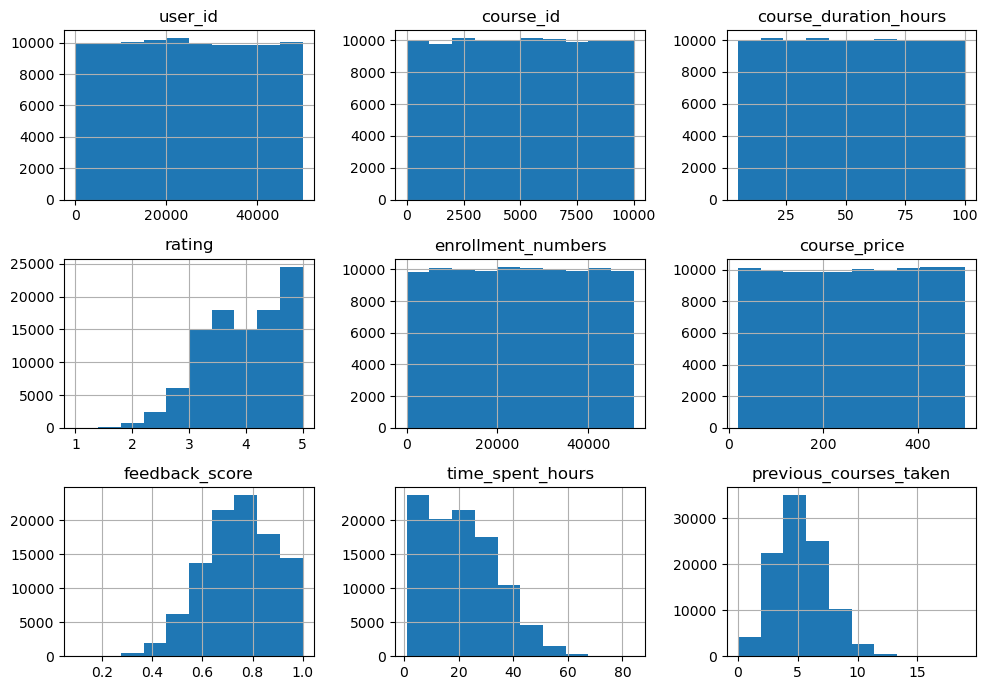

In [13]:
# Histograms for Numeric Columns

df[numeric_cols].hist(figsize=(10,7))
plt.tight_layout()
plt.show()


##### Very few users give ratings below 3
##### Most feedback scores lie between 0.6 and 0.9
##### There are no extreme low feedback scores, suggesting stable satisfaction.
##### Course Duration, Price, Enrollment Numbers are uniformly distributed (almost flat histograms).

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['course_name', 'instructor', 'certification_offered',
       'difficulty_level', 'study_material_available'],
      dtype='object')

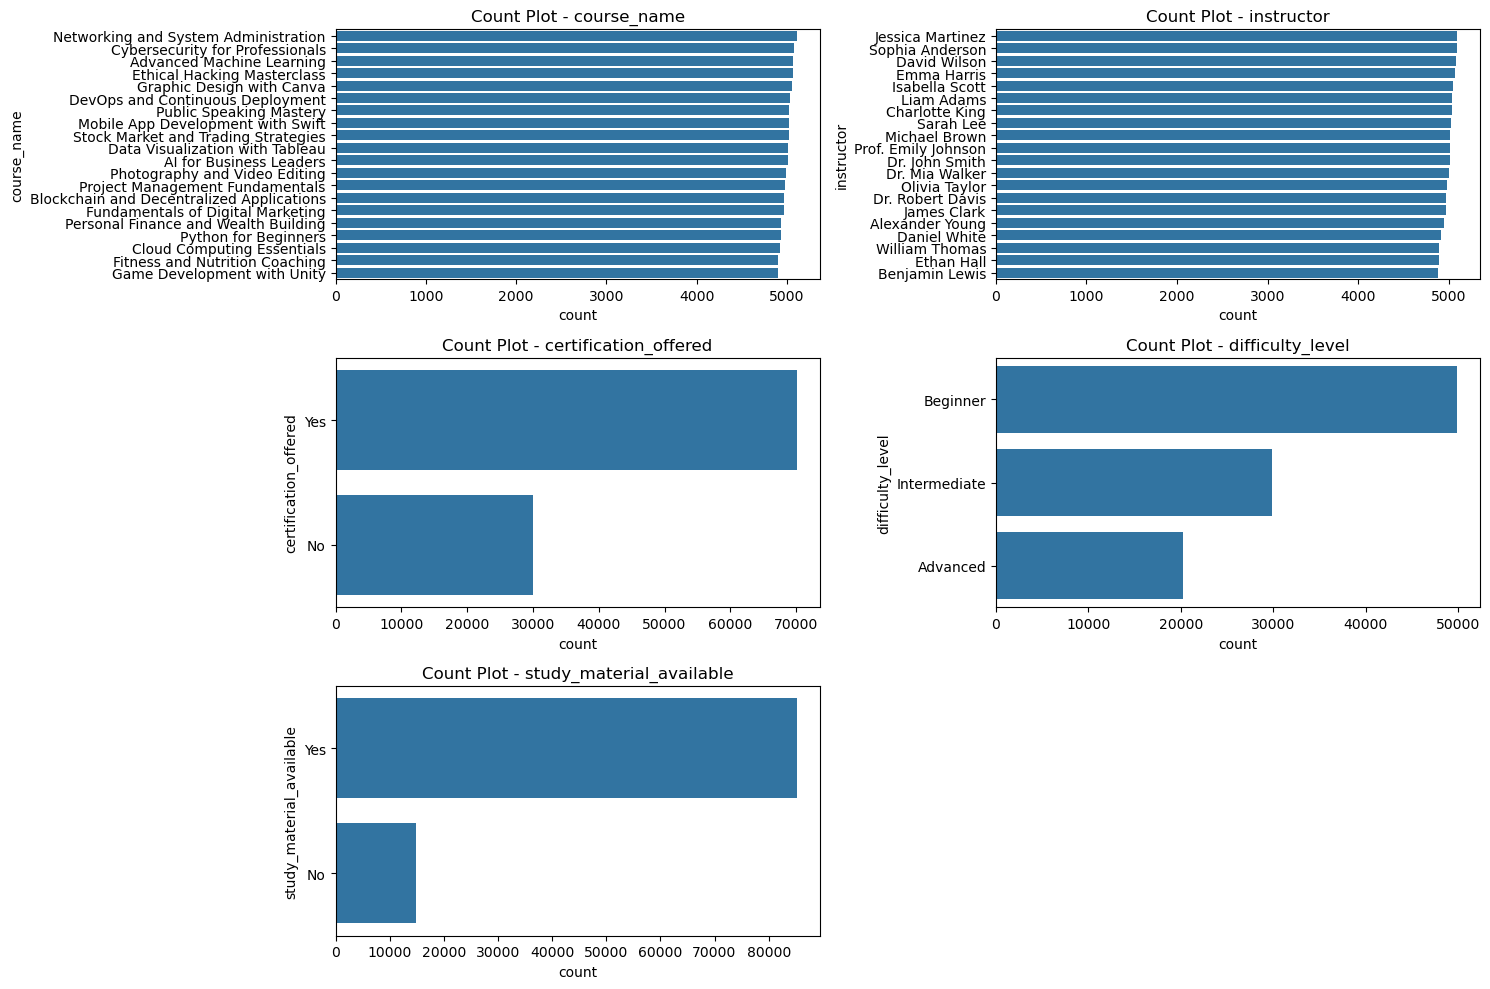

In [15]:
# Countplots for Categorical Columns

plt.figure(figsize=(15,10))
for i, col in enumerate(categorical_cols[:6]):  # show first 6 only
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Count Plot - {col}")

plt.tight_layout()
plt.show()

In [16]:
# All courses appear almost equally represented
# No course dominates the dataset
# This ensures the model does not get biased toward any specific course
# Good for building balanced recommendation models
# Instructor distribution is also uniform and balanced
# No instructor has significantly more courses than others
# Most learners prefer beginner-level courses

In [17]:
z=df.corr(numeric_only=True)
z

,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
user_id,1.000000,0.001386,0.006529,-0.002499,-0.006565,-0.001228,0.000257,-0.004690,0.000682
course_id,0.001386,1.000000,0.005748,-0.000926,0.001915,0.000230,-0.004000,-0.001025,-0.001796
course_duration_hours,0.006529,0.005748,1.000000,0.001650,-0.000591,0.002784,0.001806,-0.001776,-0.002122
rating,-0.002499,-0.000926,0.001650,1.000000,-0.001110,-0.001431,0.001477,0.002027,0.000579
enrollment_numbers,-0.006565,0.001915,-0.000591,-0.001110,1.000000,0.000441,0.001707,0.000402,0.000049
course_price,-0.001228,0.000230,0.002784,-0.001431,0.000441,1.000000,0.004129,-0.002841,0.000842
feedback_score,0.000257,-0.004000,0.001806,0.001477,0.001707,0.004129,1.000000,0.000667,-0.001546
time_spent_hours,-0.004690,-0.001025,-0.001776,0.002027,0.000402,-0.002841,0.000667,1.000000,0.002991
previous_courses_taken,0.000682,-0.001796,-0.002122,0.000579,0.000049,0.000842,-0.001546,0.002991,1.000000


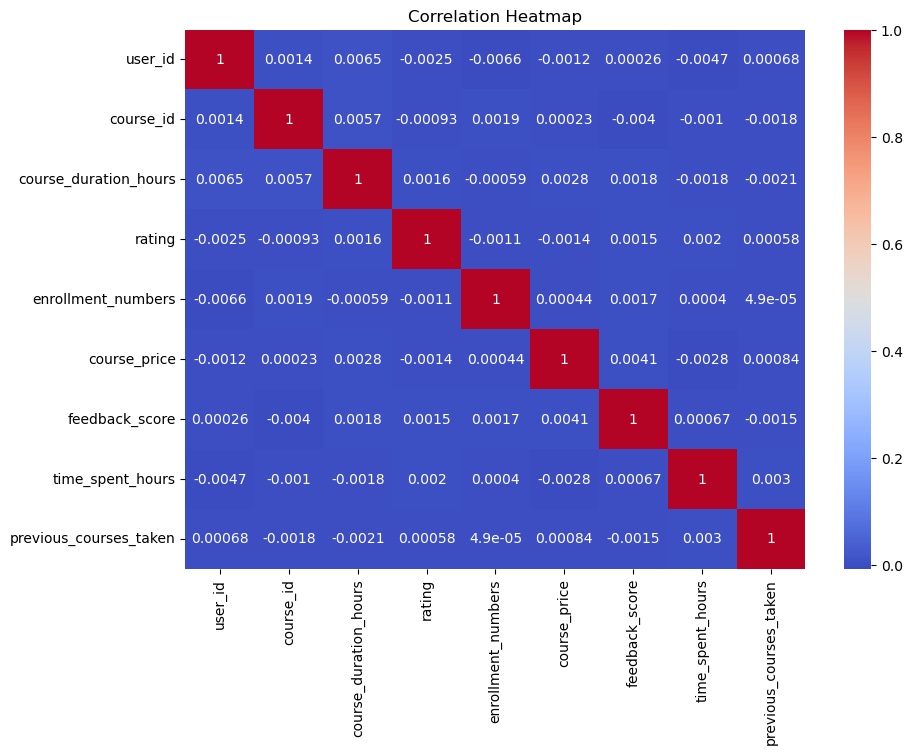

In [18]:
# Correlation Heatmap

plt.figure(figsize=(10,7))
sns.heatmap(z, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


##### Almost all correlations are extremely close to 0
##### The dataset shows no strong linear relationship between any numeric features.
##### This means the dataset is clean, independent, and ready for recommendation modeling

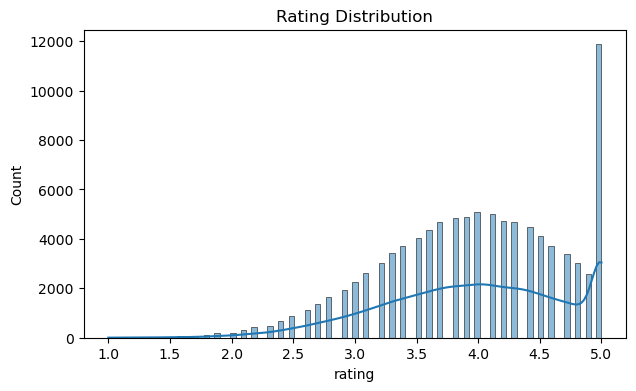

In [19]:
# Rating Distribution

plt.figure(figsize=(7,4))
sns.histplot(df["rating"], kde=True)
plt.title("Rating Distribution")
plt.show()

# y-axis : Count of how many ratings fall into each value

##### Ratings are not uniformly distributed
##### Most ratings cluster around 3.5 to 5, indicating users tend to give positive ratings.
##### Very low ratings are rare → shows positive skew
##### This suggests users generally find courses satisfactory or higher.

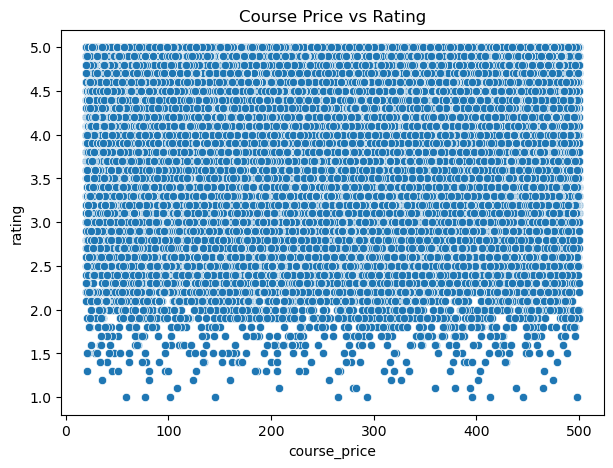

In [20]:
# Price vs Rating

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="course_price", y="rating")
plt.title("Course Price vs Rating")
plt.show()


##### No price category stands out
##### Cheap and expensive courses show similar rating distributions

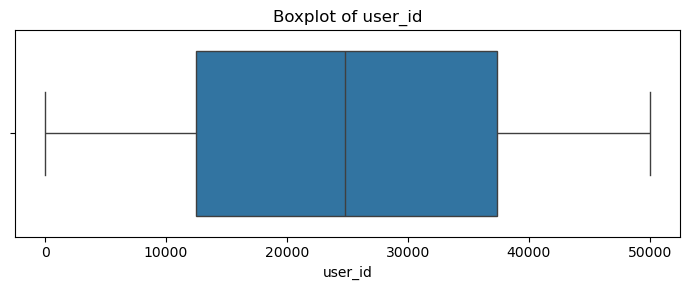

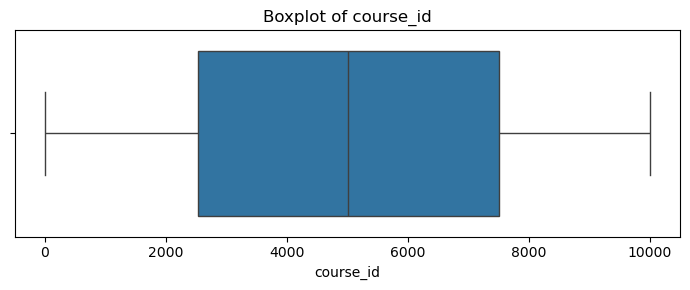

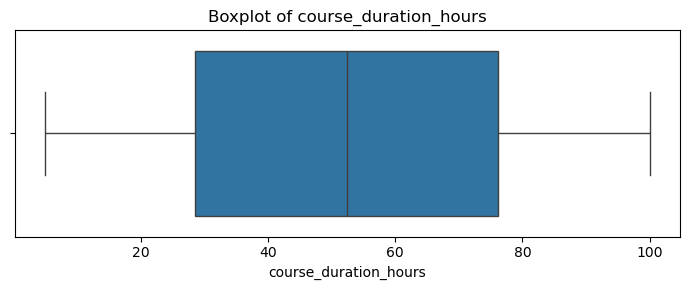

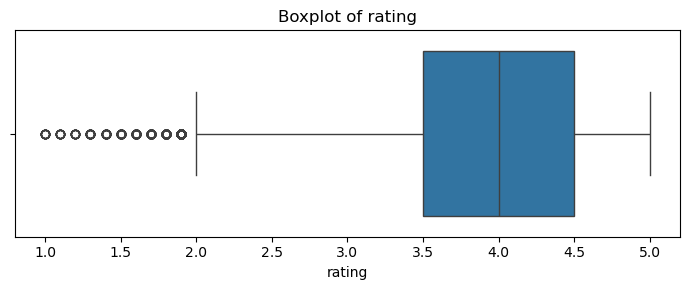

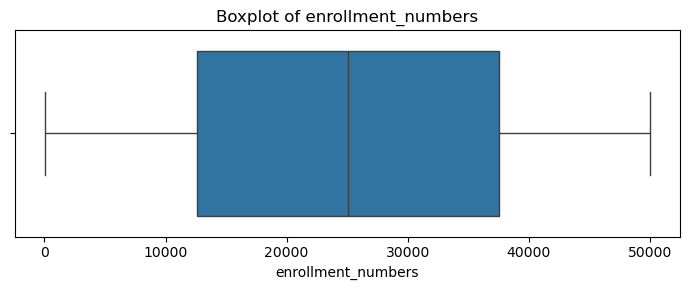

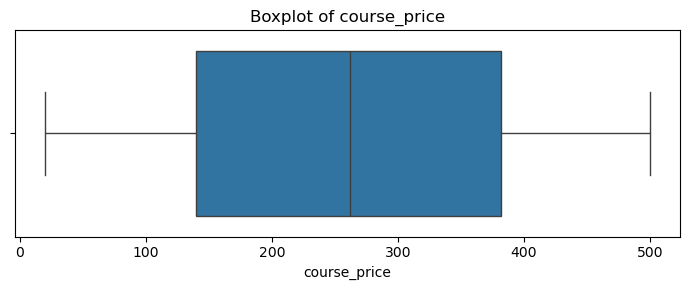

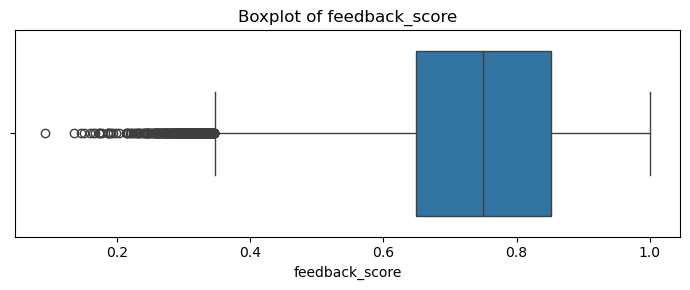

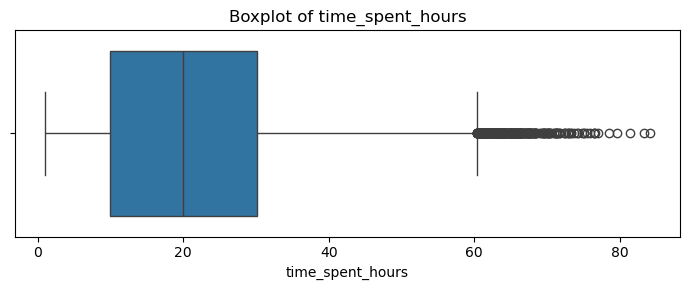

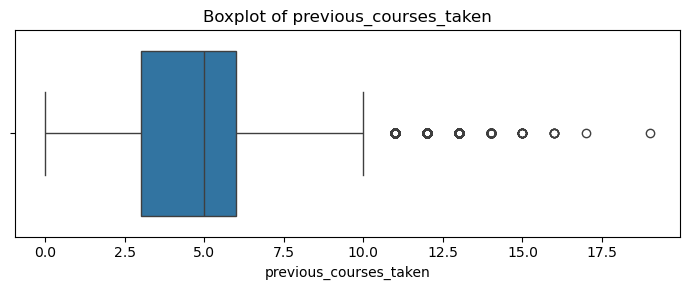

In [21]:
# 6. Outlier Detection (Boxplots)
# =======================
for col in numeric_cols:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [22]:
print("Categorical Columns:", list(categorical_cols))

Categorical Columns: ['course_name', 'instructor', 'certification_offered', 'difficulty_level', 'study_material_available']


In [23]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to all categorical columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [24]:
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,18,8,39.1,1,1,5.0,21600,317.50,0.797,1,17.60,4
1,861,1928,4,0,36.3,1,1,4.3,15379,40.99,0.770,1,28.97,9
2,38159,9541,6,6,13.4,1,1,3.9,6431,380.81,0.772,1,52.44,4
3,44733,3708,16,1,58.3,1,1,3.1,48245,342.80,0.969,0,22.29,6
4,11285,3361,7,3,30.8,1,1,2.8,34556,381.01,0.555,1,22.01,5
